In [1]:
import gymnasium as gym
import time
import matplotlib.pyplot as plt
import numpy as np
import random

In [13]:
class Cart_Pole_Q_Learning():
    def __init__(self):
        self.env = gym.make('CartPole-v1')
        self.env.reset()
        self.valid_states = self.create_discrete_values()
        self.action = [0,1]
        self.q_table = self.create_q_table()
        self.learning_rate = 0.1
        self.discount_factor = 1
        self.epsilon = 0.2
        self.episodes = 10000
        self.timesteps = 1000
        self.learned_episodes = 10
    #create discrete bounds for discretization
    def create_discrete_values (self):
        upper_bounds = self.env.observation_space.high
        lower_bounds = self.env.observation_space.low
        upper_bounds[1] = 3
        lower_bounds[1] = -3
        upper_bounds[3] = 10
        lower_bounds[3] = -10
        CartPos = np.linspace(lower_bounds[0],upper_bounds[0],30)
        CartVel = np.linspace(lower_bounds[1],upper_bounds[1],30)
        PoleAng = np.linspace(lower_bounds[2],upper_bounds[2],30)
        PoleVel = np.linspace(lower_bounds[3],upper_bounds[3],30)
        valid_states = [CartPos,CartVel,PoleAng,PoleVel]
        return valid_states

    #assign discrete values to continous states
    def discretize(self,observations):
        discrete_obs = []
        for i in range(len(observations)):
            discrete_obs.append(np.digitize(observations[i],self.valid_states[i])-1)   
        return tuple(discrete_obs)
    
    #create q_table
    def create_q_table (self):
        q_table = np.random.uniform(low = 0, high = 1, size =(len(self.valid_states[0]),len(self.valid_states[1]),len(self.valid_states[2]),len(self.valid_states[3]),len(self.action)))
        return q_table

    #choose action based on epsilon greedy policy
    def choose_action (self,observations,_):
        if _ < 500:
            return random.choice(self.action)
        if random.random() < self.epsilon:
             return random.choice(self.action)
        else:
            return np.argmax(self.q_table[observations][:])

    #progress episodes
    def progress_episodes(self):
        arr = []
        for episode in range(self.episodes):
            if episode >= 7000:
                self.epsilon = 0.999*self.epsilon
            print("Episode: ",episode+1)
            total_reward = 0
            (observations,_) = self.env.reset()
            terminated = False
            while not terminated:
                observations = self.discretize(observations)
                action = self.choose_action(observations,episode)
                (next_observations,reward,terminated,_,_) = self.env.step(action)
                total_reward += reward
                if terminated:
                    error=reward-self.q_table[observations+(action,)]
                    self.q_table[observations][action]=self.q_table[observations+(action,)]+self.learning_rate*error
                    
                else:
                    error = reward + self.discount_factor*np.max(self.q_table[self.discretize(next_observations)]) - self.q_table[observations+(action,)] 
                    self.q_table[observations+(action,)] = self.q_table[observations+(action,)] + self.learning_rate*error
                observations = next_observations
            print("Total reward: ",total_reward)
            arr.append(total_reward)
        return arr
    
    #use learned strategy
    def use_learned_strategy (self):
        arr = []
        self.env = gym.make('CartPole-v1',render_mode = 'human')
        for episode in range(self.learned_episodes):
            print("Episode: ",episode+1)
            total_reward = 0
            (observations,_) = self.env.reset()
            for ti in range(self.timesteps):
                observations = self.discretize(observations)
                action = np.argmax(self.q_table[observations])
                (observations,reward,terminated,_,_) = self.env.step(action)
                total_reward += reward
                if terminated:
                    break
            print("Total reward: ",total_reward)
            arr.append(total_reward)
        self.env.close()
        return arr
        

In [14]:
Q1 = Cart_Pole_Q_Learning()
arr = Q1.progress_episodes()

Episode:  1
Total reward:  15.0
Episode:  2
Total reward:  18.0
Episode:  3
Total reward:  21.0
Episode:  4
Total reward:  18.0
Episode:  5
Total reward:  51.0
Episode:  6
Total reward:  13.0
Episode:  7
Total reward:  31.0
Episode:  8
Total reward:  13.0
Episode:  9
Total reward:  14.0
Episode:  10
Total reward:  17.0
Episode:  11
Total reward:  35.0
Episode:  12
Total reward:  11.0
Episode:  13
Total reward:  30.0
Episode:  14
Total reward:  24.0
Episode:  15
Total reward:  25.0
Episode:  16
Total reward:  22.0
Episode:  17
Total reward:  19.0
Episode:  18
Total reward:  18.0
Episode:  19
Total reward:  15.0
Episode:  20
Total reward:  26.0
Episode:  21
Total reward:  31.0
Episode:  22
Total reward:  19.0
Episode:  23
Total reward:  13.0
Episode:  24
Total reward:  39.0
Episode:  25
Total reward:  17.0
Episode:  26
Total reward:  42.0
Episode:  27
Total reward:  14.0
Episode:  28
Total reward:  27.0
Episode:  29
Total reward:  10.0
Episode:  30
Total reward:  16.0
Episode:  31
Total 

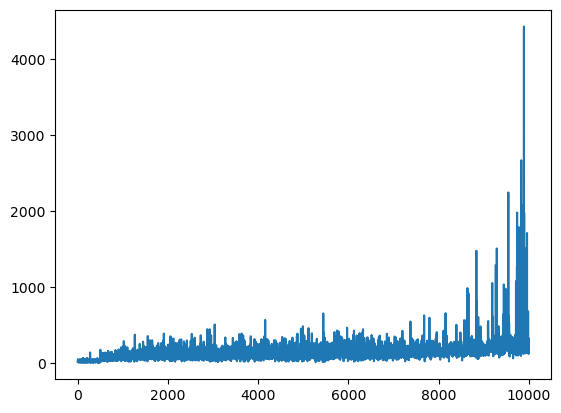

In [15]:
plt.plot(range(Q1.episodes),arr)
plt.show()

In [16]:
learned = Q1.use_learned_strategy()

Episode:  1
Total reward:  251.0
Episode:  2
Total reward:  261.0
Episode:  3
Total reward:  582.0
Episode:  4
Total reward:  268.0
Episode:  5
Total reward:  1000.0
Episode:  6
Total reward:  1000.0
Episode:  7
Total reward:  356.0
Episode:  8
Total reward:  287.0
Episode:  9
Total reward:  811.0
Episode:  10
Total reward:  297.0
